In [113]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import math
from torch import nn
from torch.utils import data
from d2l import torch as d2l
import pandas as pd
from sklearn.model_selection import train_test_split 

## 老方法  用两个文件产生的数据进行学习 
- read_date = pd.read_csv('data/train_set.csv') ##
- test_data = pd.read_csv('data/test_set.csv') 
- feature_df = read_date.iloc[:,0:-1]
- label_df = read_date.iloc[:,-1]
- test_feature_df = test_data.iloc[:,0:-1]
-test_label_df = test_data.iloc[:,-1]
-features = torch.from_numpy(feature_df.values).float()
-labels = torch.from_numpy(label_df.values).long()
-test_feature =torch.from_numpy(test_feature_df.values).float()
-test_label = torch.from_numpy(test_label_df.values).long()

In [114]:
##找到当前存放数据的路劲 （批量读取数据）##
os.chdir(r'C:\\Users\\86136\\PycharmProjects\\pythonProject\\AI -learn from zero\\tem_dataset')
##  要切换到的新路径  可以%pwd 查看当前路径
file_chdir = os.getcwd() ##  获取当前路径
file_name_list=[]
file_list=[] 
for root,dirs,files in os.walk(file_chdir):  ## file_chdir :代表需要遍历的根文件夹  root :表示正在遍历的文件夹的名字（根/子）
                                            ## dirs :记录正在遍历的文件夹下的子文件夹集合  files:记录正在遍历的文件夹中的文件集合(list形式)
    for file in files:
        if os.path.splitext(file)[-1] =='.csv': ## os.path.splitext()  分离文件名与扩展名；默认返回(fname,fextension)元组 切片后-1 表示后缀
            file_name_list.append(file)
            print(file_name_list)
            file_list.append(pd.read_csv(file,index_col=0))

['00ppms2_dset.csv']
['00ppms2_dset.csv', '10ppms2_dset.csv']
['00ppms2_dset.csv', '10ppms2_dset.csv', '20ppms2_dset.csv']
['00ppms2_dset.csv', '10ppms2_dset.csv', '20ppms2_dset.csv', '30ppms2_dset.csv']
['00ppms2_dset.csv', '10ppms2_dset.csv', '20ppms2_dset.csv', '30ppms2_dset.csv', '40ppms2_dset.csv']
['00ppms2_dset.csv', '10ppms2_dset.csv', '20ppms2_dset.csv', '30ppms2_dset.csv', '40ppms2_dset.csv', '60ppms2_dset.csv']
['00ppms2_dset.csv', '10ppms2_dset.csv', '20ppms2_dset.csv', '30ppms2_dset.csv', '40ppms2_dset.csv', '60ppms2_dset.csv', '70ppms2_dset.csv']
['00ppms2_dset.csv', '10ppms2_dset.csv', '20ppms2_dset.csv', '30ppms2_dset.csv', '40ppms2_dset.csv', '60ppms2_dset.csv', '70ppms2_dset.csv', '80ppms2_dset.csv']
['00ppms2_dset.csv', '10ppms2_dset.csv', '20ppms2_dset.csv', '30ppms2_dset.csv', '40ppms2_dset.csv', '60ppms2_dset.csv', '70ppms2_dset.csv', '80ppms2_dset.csv', '90ppms2_dset.csv']


In [115]:
feature = np.empty(shape=(0,3)) ## 创建空的np array 必须要有shape 参数
label = np.empty(shape=(0,3))
## 将label 和 feature 分开
for i in range(len(file_list)):
    label = np.append(label,np.array(file_list[i].iloc[:,-1]))
    feature = np.append(feature,np.array(file_list[i].iloc[:,0:-1]))

In [116]:
feature.shape[0]

140700

In [117]:
title = input('本次实验的气体是（英文）')

本次实验的气体是（英文）eth


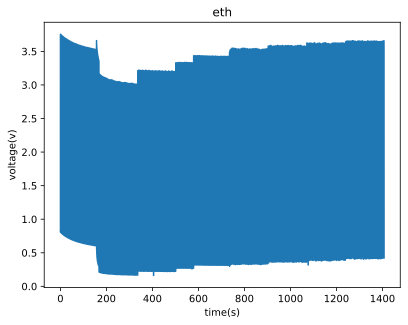

In [118]:
t= np.linspace(0,feature.shape[0]/100,feature.shape[0])
h2= plt.plot(t,feature[0:feature.shape[0]])
plt.ylabel('voltage(v)')
plt.xlabel('time(s)')
plt.title(title)
plt.savefig('./{}.jpg'.format(title) )

In [119]:
## 将数据分为多组的 输入和label  （这里label 用于做one hot 只能是一维的输入  因此不适用 reshape）
feature= feature.reshape(-1,70)
# label = label/10

## 分出训练集和测试集  

In [120]:
label

array([ 0.,  0.,  0., ..., 90., 90., 90.])

In [121]:
## 这里的splite 已经自带 shuffle 
features,test_feature,labels,test_label =  train_test_split(feature, label, test_size=0.2) ## 特定的库中 适用的分离 训练集和测试集的方法

## 将数据类型转化为tensor
features = torch.from_numpy(features).float()
labels = torch.from_numpy(labels).long()
test_feature =torch.from_numpy(test_feature).float()
test_label = torch.from_numpy(test_label).long()

## <span class="burk">这里dataloader 是否shuffle 对预测的波动影响比较大   不懂为啥</span>

##  可能可以通过dropout 正则等方式加强稳定性

In [122]:
## 使用dataloder  和 tensordataset ： 把 多个tensor 变成 多元组 因此每个tensor的长度必须一致
def load_array(data_arrays,batch_size,is_train = True):
    dataset =data.TensorDataset(*data_arrays)   ## TensorDataset的作用是将多个的tensor 变成一个多元组  其中*data_array的第一维度长度必须相等
    return data.DataLoader(dataset,batch_size,shuffle =False)
def load_test(data_arrays,batch_size,is_test = False):
    dataset =data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle =False)
batch_size =10  # 超参数
seed=10 ## 随机种子
torch.manual_seed(seed)
data_iter = load_array((features,labels),batch_size) # 训练集
test_iter = load_test((test_feature,test_label),batch_size)  # 测试集

next(iter(test_iter))

[tensor([[0.3670, 0.3676, 0.3679, 0.3663, 0.3705, 0.3650, 0.3686, 0.3683, 0.3679,
          0.3679, 0.3683, 0.3692, 0.3673, 0.3683, 0.3683, 0.3673, 0.3689, 0.3686,
          0.3679, 0.3686, 0.3676, 2.5110, 3.2962, 3.5063, 3.5617, 3.5720, 3.5711,
          3.5749, 3.5662, 3.5569, 3.5492, 3.5498, 3.5424, 3.5331, 3.5240, 3.5269,
          3.5176, 3.5079, 3.5031, 3.5034, 3.4944, 3.4892, 3.4915, 3.4828, 3.4741,
          3.4734, 3.4709, 3.4631, 3.4570, 3.4596, 3.4522, 2.5313, 1.3713, 0.7907,
          0.5522, 0.4536, 0.4095, 0.3886, 0.3792, 0.3741, 0.3705, 0.3699, 0.3683,
          0.3666, 0.3657, 0.3686, 0.3634, 0.3654, 0.3634, 0.3647],
         [0.2255, 0.2258, 0.2258, 0.2262, 0.2268, 0.2255, 0.2255, 0.2252, 0.2252,
          0.2258, 0.2258, 0.2252, 0.2265, 0.2258, 0.2265, 0.2258, 0.2252, 0.2262,
          0.2255, 0.2258, 0.2258, 1.8769, 2.8387, 3.0994, 3.1786, 3.2021, 3.2041,
          3.2005, 3.1876, 3.1796, 3.1738, 3.1670, 3.1493, 3.1458, 3.1393, 3.1335,
          3.1280, 3.1122, 3.108

In [123]:
## 定义网络 
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(70, 1))
                    #nn.Dropout(0.5)
                    #nn.ReLU(),
                   # nn.Linear(60,3))
## 初始化权重 
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [124]:
## 定义损失函数 
loss = nn.MSELoss(reduction='mean')

C:\Users\86136\.conda\envs\glenn_pytorch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [125]:
# trainer = torch.optim.SGD([
#         {"params":net[1].weight,'weight_decay': 1},
#         {"params":net[1].bias}], lr=0.05)
## SDG 随机梯度优方式
trainer = torch.optim.SGD(net.parameters(),lr=0.25) 

C:\Users\86136\.conda\envs\glenn_pytorch\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: Found dtype Long but expected Float

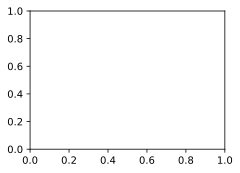

In [126]:
num_epochs = 20
d2l.train_ch3(net, data_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
print(net)

In [ ]:
import torchsummary

In [ ]:
print(net[1].state_dict())